# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

I will need to dummify the Species, Island, Gender, Sex, and Year.

In [ ]:
pip install palmerpenguins

In [ ]:
pip install scikit-learn

In [ ]:
# Code Here
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from plotnine import *

In [ ]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
penguins["bill_length squared"] = penguins["bill_length_mm"] ** 2
penguins["bill_length cubed"] = penguins["bill_length_mm"] ** 3
penguins["bill_length 10"] = penguins["bill_length_mm"] ** 10


In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length squared,bill_length cubed,bill_length 10
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81,59776.471,8.351559e+15
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25,61629.875,9.246363e+15
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1624.09,65450.827,1.129927e+16
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1346.89,49430.863,4.432621e+15
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1544.49,60698.457,8.788717e+15
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,3113.64,173741.112,2.926456e+17
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,1892.25,82312.875,2.426010e+16
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,2460.16,122023.936,9.011908e+16
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,2580.64,131096.512,1.144556e+17


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Code Here

#Simple linear regression model

y1 = penguins['bill_depth_mm']
X1 = penguins[['bill_length_mm']]

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25)

lr = LinearRegression()

Model1 = lr.fit(X_train, y_train)
y_pred_lr = Model1.predict(X_test)
print(mean_squared_error(y_test, y_pred_lr))



3.6133281175070215


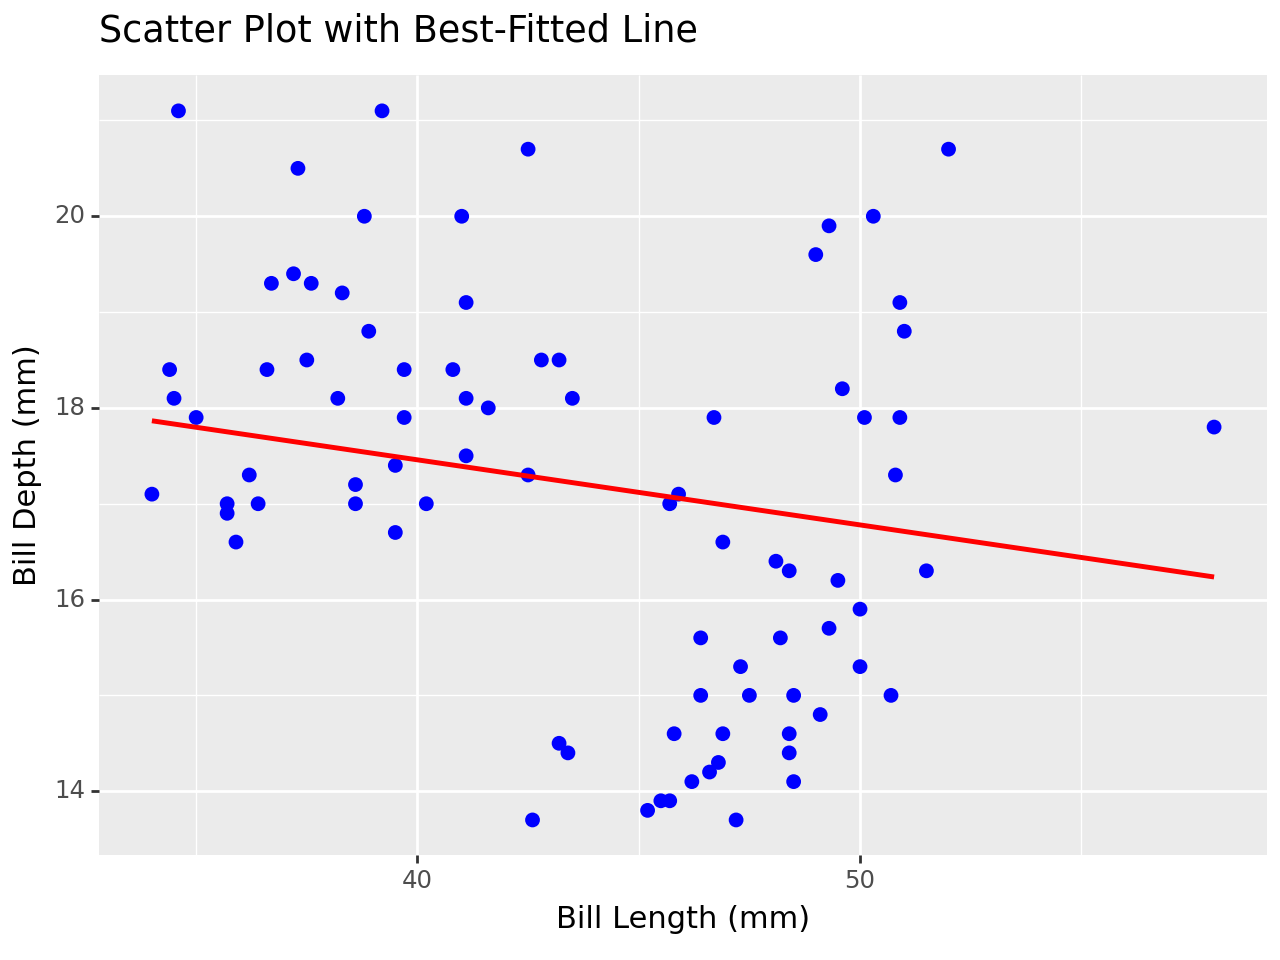

In [ ]:
scatter_data = pd.DataFrame({'bill_length_mm': X_test['bill_length_mm'], 'bill_depth_mm': y_test, 'y_pred_lr': y_pred_lr})

# Create a scatter plot
scatter_plot = (
    ggplot(scatter_data, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color='blue', size=2) +
    geom_line(aes(x='bill_length_mm', y='y_pred_lr'), color='red', size=1) +
    labs(title='Scatter Plot with Best-Fitted Line', x='Bill Length (mm)', y='Bill Depth (mm)')
)

print(scatter_plot)

In [ ]:
#Quadratic linear regression model

y2 = penguins['bill_depth_mm']
X2 = penguins[['bill_length squared', 'bill_length_mm']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25)

lr = LinearRegression()

Model2 = lr.fit(X_train2, y_train2)
y_pred_lr2 = Model2.predict(X_test2)
print(mean_squared_error(y_test2, y_pred_lr2))


3.9269808484979594


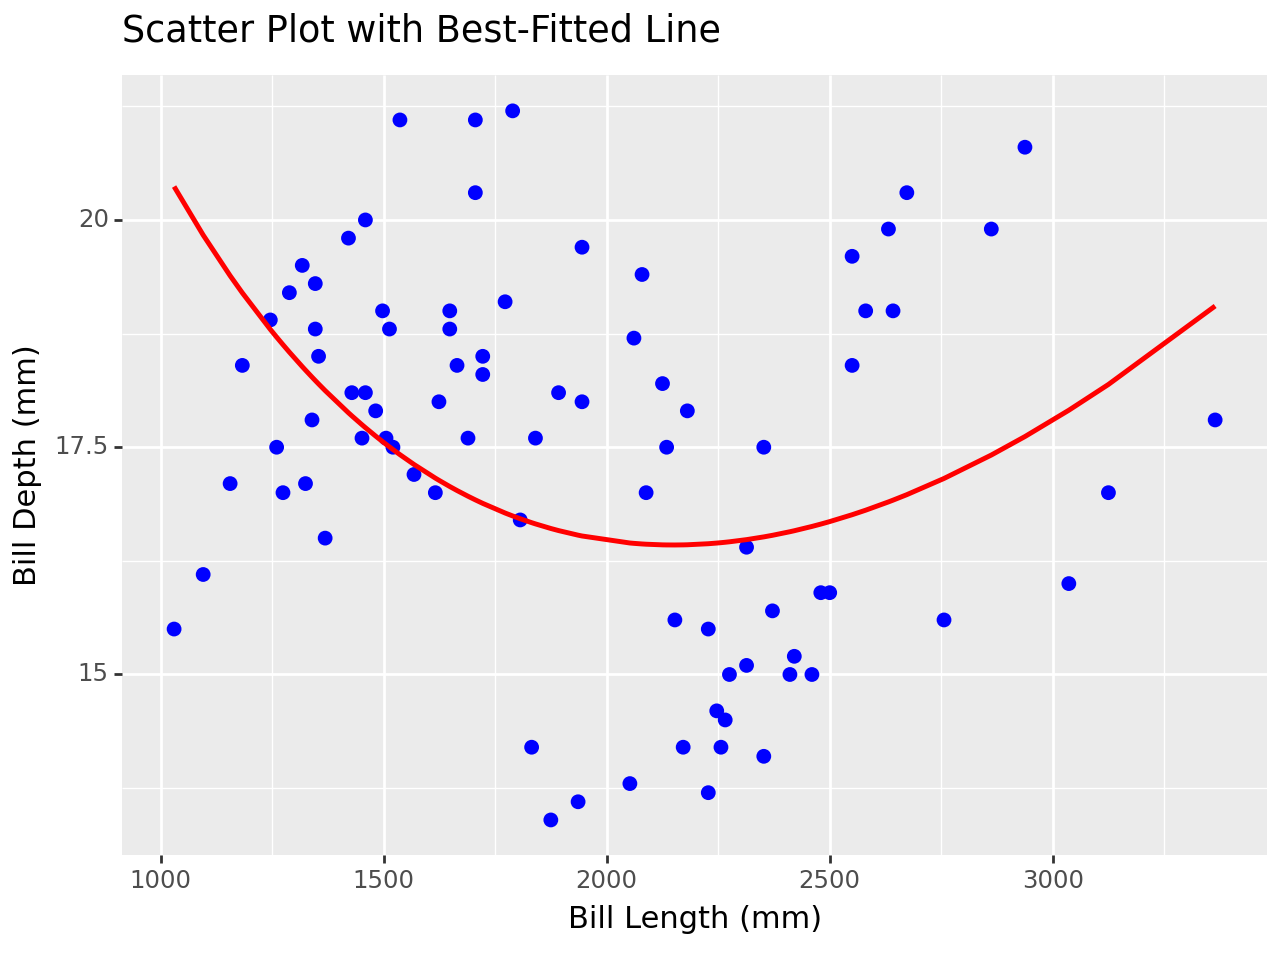

In [ ]:
scatter_data = pd.DataFrame({'bill_length squared': X_test2['bill_length squared'], 'bill_depth_mm': y_test2, 'y_pred_lr': y_pred_lr2})

# Create a scatter plot
scatter_plot = (
    ggplot(scatter_data, aes(x='bill_length squared', y='bill_depth_mm')) +
    geom_point(color='blue', size=2) +
    geom_line(aes(x='bill_length squared', y='y_pred_lr2'), color='red', size=1) +
    labs(title='Scatter Plot with Best-Fitted Line', x='Bill Length (mm)', y='Bill Depth (mm)')
)

print(scatter_plot)

In [ ]:
#Cubic linear regression model

y3 = penguins['bill_depth_mm']
X3 = penguins[['bill_length cubed', 'bill_length_mm']]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25)

lr = LinearRegression()

Model3 = lr.fit(X_train3, y_train3)
y_pred_lr3 = Model3.predict(X_test3)
print(mean_squared_error(y_test3, y_pred_lr3))

3.0997831062767056


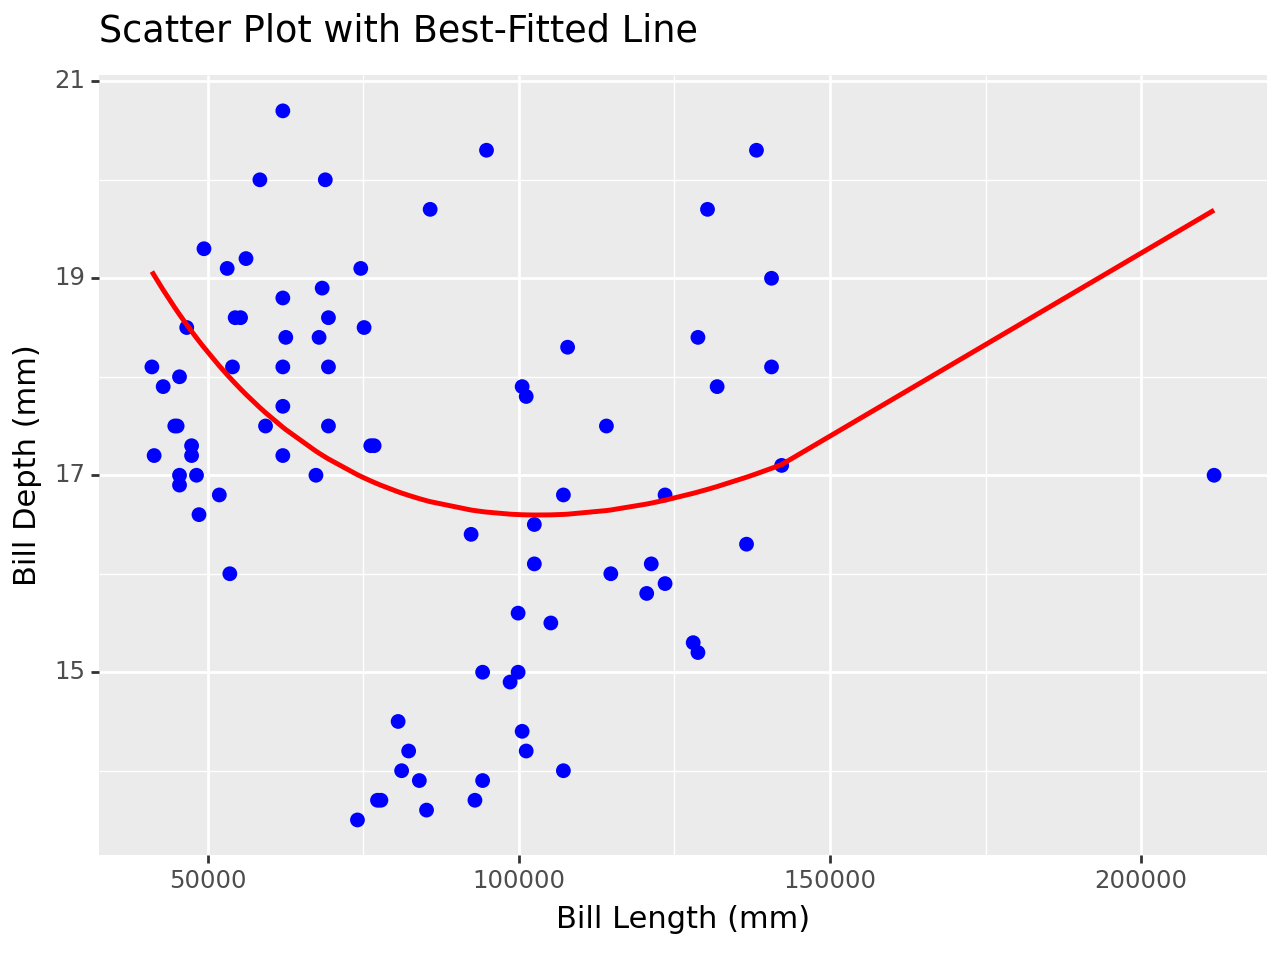

In [ ]:
scatter_data = pd.DataFrame({'bill_length cubed': X_test3['bill_length cubed'], 'bill_depth_mm': y_test3, 'y_pred_lr': y_pred_lr3})

# Create a scatter plot
scatter_plot = (
    ggplot(scatter_data, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color='blue', size=2) +
    geom_line(aes(x='bill_length cubed', y='y_pred_lr3'), color='red', size=1) +
    labs(title='Scatter Plot with Best-Fitted Line', x='Bill Length (mm)', y='Bill Depth (mm)')
)

print(scatter_plot)

In [ ]:
#Tenth power linear regression model

y4 = penguins['bill_depth_mm']
X4 = penguins[['bill_length 10', 'bill_length_mm']]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25)

lr = LinearRegression()

Model4 = lr.fit(X_train4, y_train4)
y_pred_lr4 = Model4.predict(X_test4)
print(mean_squared_error(y_test4, y_pred_lr4))

4.281307920640622


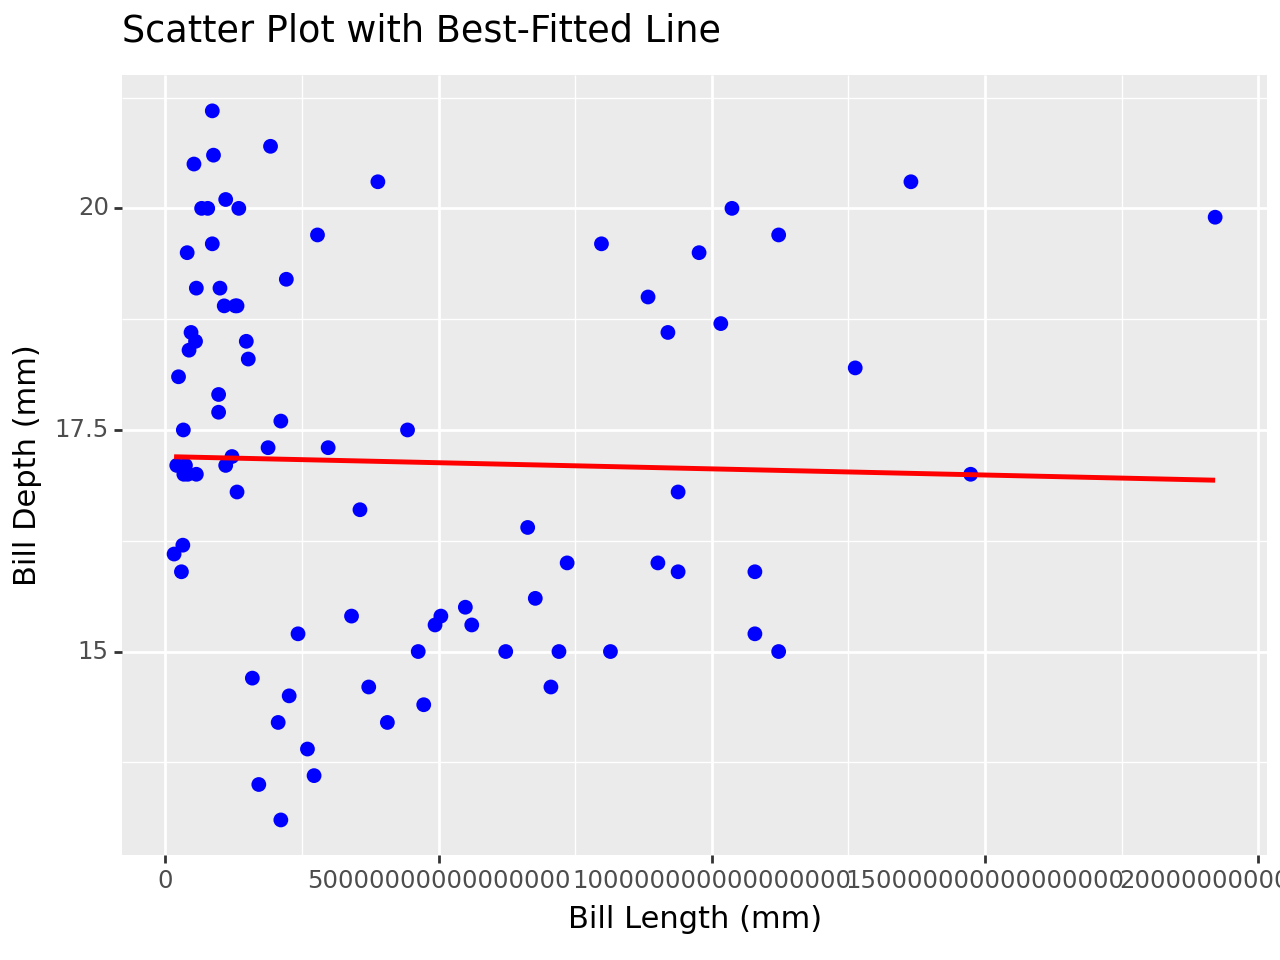

In [ ]:
scatter_data = pd.DataFrame({'bill_length 10': X_test4['bill_length 10'], 'bill_depth_mm': y_test4, 'y_pred_lr': y_pred_lr4})

# Create a scatter plot
scatter_plot = (
    ggplot(scatter_data, aes(x='bill_length 10', y='bill_depth_mm')) +
    geom_point(color='blue', size=2) +
    geom_line(aes(x='bill_length 10', y='y_pred_lr4'), color='red', size=1) +
    labs(title='Scatter Plot with Best-Fitted Line', x='Bill Length (mm)', y='Bill Depth (mm)')
)

print(scatter_plot)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

I think the quadratic and cube model fits the data the best because the line cover the most points/observations. The simple linear regression model and the 10th power regression model is underfitting the data because the regression line go over so few of the observations. The cube model might be over fitting because it is also trying to take into account the extremes/quirks or noises of the data. So from the way the graph is visualized, the quadratic model fits the data the best.